In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Reading Data
df= pd.read_csv('flights.csv')
df

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,...,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00,Endeavor Air Inc.
336772,336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,...,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00,Endeavor Air Inc.
336773,336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,...,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00,Envoy Air
336774,336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,...,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00,Envoy Air


In [4]:
# Description

df.head() # Top Rows in the data
df.tail() # Least Rows in the data
df.describe() # Get Summary of each Numeical Column Like count, mean, standard deviation

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.000000,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,168387.500000,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,97219.001466,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,0.000000,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,84193.750000,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,168387.500000,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,252581.250000,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,336775.000000,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [13]:
# Cleaning

# Missing Values:
df.isnull().sum() # Show The Sum of the null Values in each Column
df.dropna() # Drop Rows/Columns with a missing value init from the dataFrame
df['dep_time'].fillna(df['dep_time'].mean()) # Fill Missing Values in a Column with the Given Value

# Outliers:
stats.zscore(df['sched_dep_time']) # Identify outliers
np.clip(df['sched_dep_time'], df['sched_dep_time'].min(),df['sched_dep_time'].max() )

0          515
1          529
2          540
3          545
4          600
          ... 
336771    1455
336772    2200
336773    1210
336774    1159
336775     840
Name: sched_dep_time, Length: 336776, dtype: int64

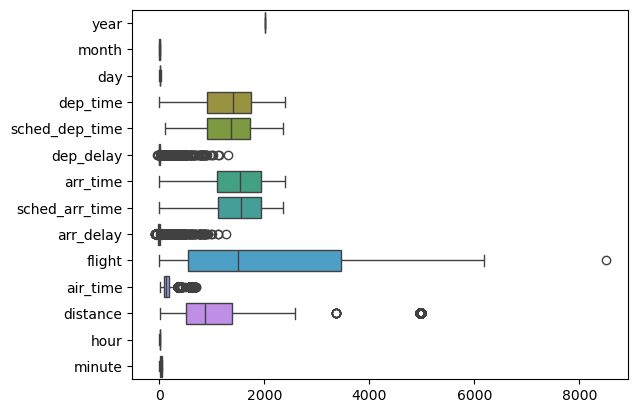

In [18]:
# EDA

sns.boxplot(data=df.drop('id',axis=1), orient='h')
plt.show()

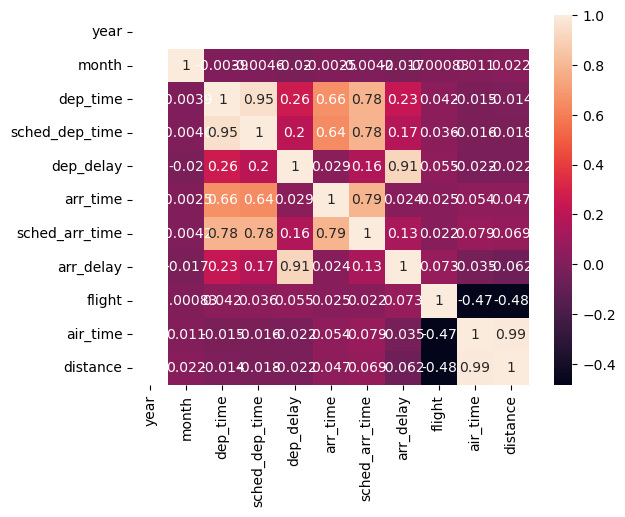

In [26]:
corr_matrix = df.drop(['id','minute','hour','day'],axis=1).corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()